<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Libs" data-toc-modified-id="Importing-Libs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Libs</a></span></li><li><span><a href="#Loading-and-Cleaning-Data" data-toc-modified-id="Loading-and-Cleaning-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading and Cleaning Data</a></span></li><li><span><a href="#Trend-and-Seasonality-Model" data-toc-modified-id="Trend-and-Seasonality-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Trend and Seasonality Model</a></span><ul class="toc-item"><li><span><a href="#Trend" data-toc-modified-id="Trend-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Trend</a></span></li><li><span><a href="#Seasonality-+-Trend" data-toc-modified-id="Seasonality-+-Trend-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Seasonality + Trend</a></span></li><li><span><a href="#Encoding-Weather-Seasons" data-toc-modified-id="Encoding-Weather-Seasons-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Encoding Weather Seasons</a></span></li></ul></li><li><span><a href="#Extract-the-Remainder-and-calculate-the-lag-of-it" data-toc-modified-id="Extract-the-Remainder-and-calculate-the-lag-of-it-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Extract the Remainder and calculate the lag of it</a></span></li><li><span><a href="#Running-AR-on-the-remainder" data-toc-modified-id="Running-AR-on-the-remainder-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Running AR on the remainder</a></span></li><li><span><a href="#Fitting-Training-Data-with-the-remainder-lag-feature" data-toc-modified-id="Fitting-Training-Data-with-the-remainder-lag-feature-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Fitting Training Data with the remainder lag feature</a></span></li><li><span><a href="#Evaluating-LinReg-Model" data-toc-modified-id="Evaluating-LinReg-Model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Evaluating LinReg Model</a></span></li><li><span><a href="#Predicting-Test-Data" data-toc-modified-id="Predicting-Test-Data-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Predicting Test Data</a></span><ul class="toc-item"><li><span><a href="#Transforming-Test-Data-Format-into-Train-Data-Format" data-toc-modified-id="Transforming-Test-Data-Format-into-Train-Data-Format-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Transforming Test Data Format into Train Data Format</a></span></li><li><span><a href="#Test-Data-Trend" data-toc-modified-id="Test-Data-Trend-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Test Data Trend</a></span></li><li><span><a href="#Test-Data-Seasonality-+-Seasons" data-toc-modified-id="Test-Data-Seasonality-+-Seasons-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Test Data Seasonality + Seasons</a></span></li><li><span><a href="#Test-Data-Remainder-Lag" data-toc-modified-id="Test-Data-Remainder-Lag-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Test Data Remainder Lag</a></span></li><li><span><a href="#Plotting-actual-and-predictions" data-toc-modified-id="Plotting-actual-and-predictions-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Plotting actual and predictions</a></span></li></ul></li><li><span><a href="#Export-Data" data-toc-modified-id="Export-Data-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Export Data</a></span></li></ul></div>

### Importing Libs

In [177]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

from statsmodels.tsa.seasonal import seasonal_decompose
# for evaluating LinReg
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import r2_score
# for choosing whether to use more lag features
from statsmodels.tsa.ar_model import ar_select_order, AutoReg

plt.rcParams['figure.figsize'] = (16, 6)
x = np.linspace(0, 10, 101)

In [109]:
# Using for plottings. Copied from Dinas notebook

def plot_timeseries (df, title=" ", ylim=True):
    '''
    Custom plotting function for plotting the flights dataset
    
    Parameters
    ----------
    df : pd.DataFrame
        The data to plot.
    title : str
        The title of the plot
    ylim : bool
        Whether to fix the minimum value of y; defalut is True
    
    Returns
    -------
    Plots the data
    '''
    
    df.plot()
    plt.title(title)
    if ylim:
        plt.ylim(ymin=0)
    plt.ylabel("Passengers in 1000s")
    plt.show()

In [13]:
cd ECA_blended_custom/

/Users/oguzhanbekar/OneDrive/Spiced/euclidean-eukalyptus-student-code/07_week/data/ECA_blended_custom


### Loading and Cleaning Data

In [14]:
df = pd.read_csv('TG_STAID002759.txt',skiprows=19)

In [15]:
df.drop(columns=['SOUID','Q_TG'],inplace=True)

In [16]:
df['DATE'] = pd.to_datetime(df['DATE'].astype(str))
df['TG'] = df['TG']*0.1 
df.set_index('DATE',inplace=True)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25568 entries, 1951-01-01 to 2020-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TG      25568 non-null  float64
dtypes: float64(1)
memory usage: 399.5 KB


In [18]:
df.head()

,TG
DATE,
1951-01-01,-4.0
1951-01-02,-1.4
1951-01-03,-1.2
1951-01-04,0.4
1951-01-05,2.5


In [364]:
train_data = df.loc['1980':'2019']

In [420]:
test_data = df.loc['2020']

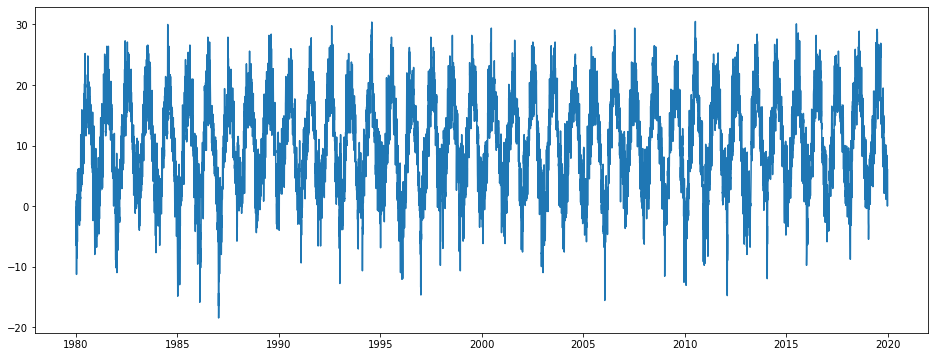

In [366]:
plt.plot(train_data.index,train_data['TG'])

### Trend and Seasonality Model

In [367]:
train_data.reset_index(inplace=True)
train_data.rename(columns={'index':'timestep'}, inplace=True)
train_data.reset_index(inplace=True)
train_data.rename(columns={'index':'timestep'}, inplace=True)

/Users/oguzhanbekar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [368]:
train_data.head()

,timestep,DATE,TG
0,0,1980-01-01,0.8
1,1,1980-01-02,-0.5
2,2,1980-01-03,-3.5
3,3,1980-01-04,-6.5
4,4,1980-01-05,-2.3


#### Trend

In [369]:
m = LinearRegression()
X = train_data[['timestep']]
y = train_data['TG']
m.fit(X,y)

LinearRegression()

In [370]:
train_data.head()

,timestep,DATE,TG
0,0,1980-01-01,0.8
1,1,1980-01-02,-0.5
2,2,1980-01-03,-3.5
3,3,1980-01-04,-6.5
4,4,1980-01-05,-2.3


In [371]:
train_data.set_index('DATE',inplace=True)

<AxesSubplot:xlabel='DATE', ylabel='TG'>

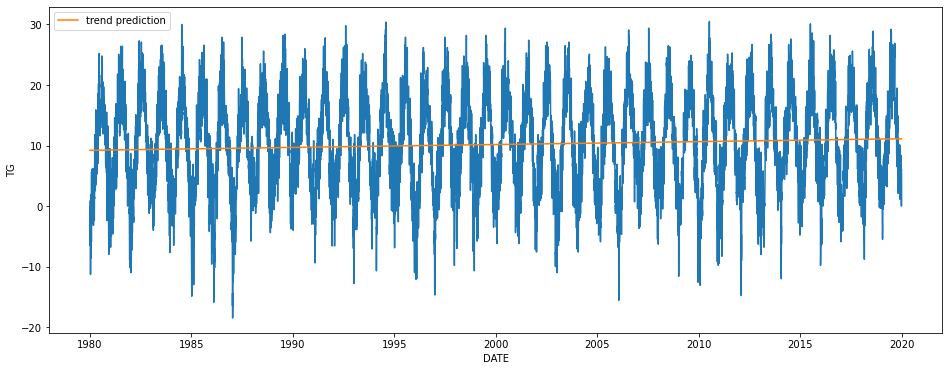

In [372]:
sns.lineplot(data=train_data.TG)
sns.lineplot(x=train_data.index, y=m.predict(X), label='trend prediction')

#### Seasonality + Trend

In [373]:
train_data['month_name'] = train_data.index.month_name()

<ipython-input-373-2ff54c15f55b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['month_name'] = train_data.index.month_name()


In [374]:
train_data.head()

,timestep,TG,month_name
DATE,,,
1980-01-01,0,0.8,January
1980-01-02,1,-0.5,January
1980-01-03,2,-3.5,January
1980-01-04,3,-6.5,January
1980-01-05,4,-2.3,January


#### Encoding Weather Seasons

In [375]:
train_data.loc[(train_data.index.month_name() == 'December') |
               (train_data.index.month_name() == 'January') |
               (train_data.index.month_name() == 'February'), 'season'] = 'Winter'  
train_data.loc[(train_data.index.month_name() == 'March') |
               (train_data.index.month_name() == 'April') |
               (train_data.index.month_name() == 'May'), 'season'] = 'Spring'  
train_data.loc[(train_data.index.month_name() == 'June') |
               (train_data.index.month_name() == 'July') |
               (train_data.index.month_name() == 'August'), 'season'] = 'Summer'  
train_data.loc[(train_data.index.month_name() == 'September') |
               (train_data.index.month_name() == 'October') |
               (train_data.index.month_name() == 'November'), 'season'] = 'Autumn'  

# train_data.loc[(df['first_name'] != 'Bill') & (df['first_name'] != 'Emma'), 'name_match'] = 'Mismatch'  


/Users/oguzhanbekar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/oguzhanbekar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [376]:
train_data = pd.get_dummies(train_data, prefix='',prefix_sep='',drop_first=True)

In [377]:
train_data.head()

,timestep,TG,August,December,February,January,July,June,March,May,November,October,September,Spring,Summer,Winter
DATE,,,,,,,,,,,,,,,,
1980-01-01,0,0.8,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1980-01-02,1,-0.5,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1980-01-03,2,-3.5,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1980-01-04,3,-6.5,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1980-01-05,4,-2.3,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [312]:
X_season

,timestep,April,August,December,February,January,July,June,March,May,...,September,Autumn,Spring,Summer,Winter,seasonal,remainder,lag,prediction_ar1,residual
DATE,,,,,,,,,,,,,,,,,,,,,
1980-01-02,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,-0.065053,-0.434947,0.865175,0.698834,-1.133781
1980-01-03,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,-0.064931,-3.435069,-0.434947,-0.351164,-3.083905
1980-01-04,3,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,-0.064809,-6.435191,-3.435069,-2.774109,-3.661082
1980-01-05,4,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,-0.064687,-2.235313,-6.435191,-5.197053,2.961741
1980-01-06,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,-0.064566,-0.135434,-2.235313,-1.805167,1.669733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,14605,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,3.017661,0.082339,1.882461,1.520410,-1.438071
2019-12-28,14606,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,3.017782,-1.717782,0.082339,0.066604,-1.784387
2019-12-29,14607,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,3.017904,-3.017904,-1.717782,-1.387202,-1.630703


In [378]:
m_season = LinearRegression()
X_season = train_data.loc[:,train_data.columns != 'TG']
y_season = train_data['TG']
m_season.fit(X_season,y_season)

LinearRegression()

<AxesSubplot:xlabel='DATE', ylabel='TG'>

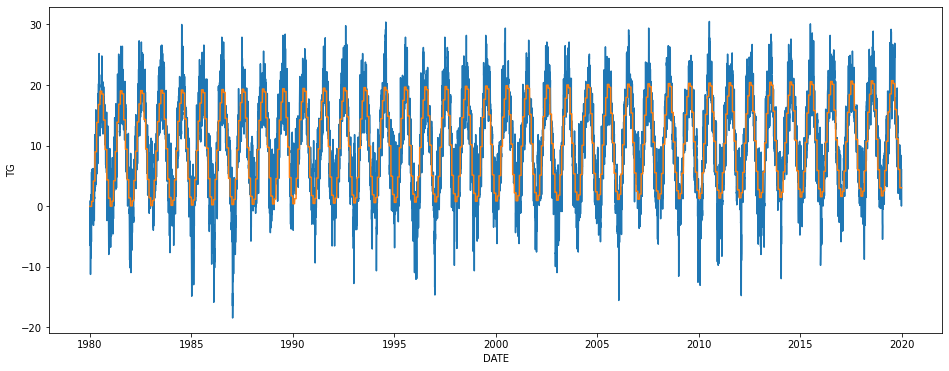

In [379]:
sns.lineplot(data=train_data.TG)
sns.lineplot(x=train_data.index,y=m_season.predict(X_season))

### Extract the Remainder and calculate the lag of it

<AxesSubplot:xlabel='DATE', ylabel='seasonal'>

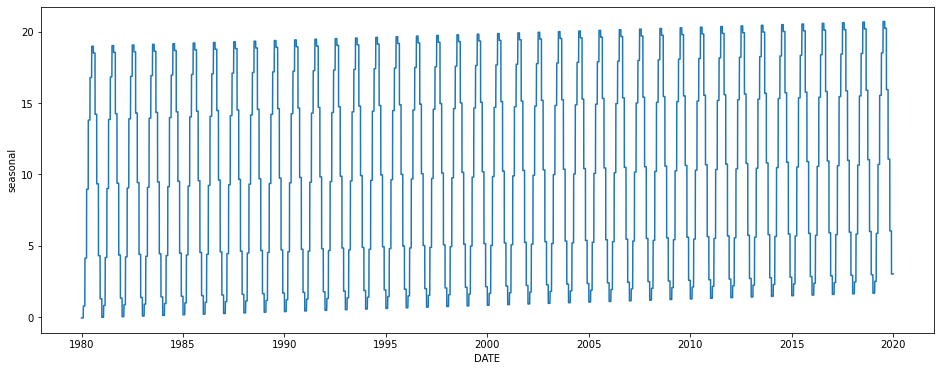

In [380]:
train_data['seasonal'] = m_season.predict(X_season)
train_data['remainder'] = train_data['TG']-train_data['seasonal']

sns.lineplot(data=train_data.seasonal)

<AxesSubplot:xlabel='DATE', ylabel='remainder'>

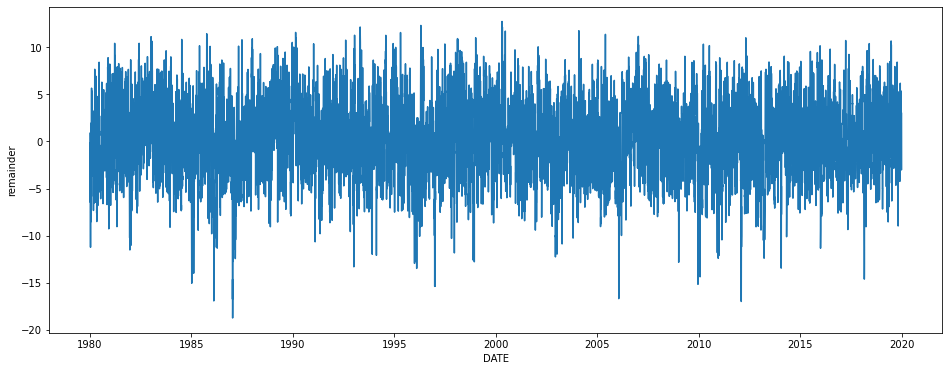

In [381]:
sns.lineplot(data=train_data.remainder)

In [382]:
train_data['lag'] = train_data['remainder'].shift(1)
train_data.dropna(inplace=True)

In [383]:
train_data.head()

,timestep,TG,August,December,February,January,July,June,March,May,November,October,September,Spring,Summer,Winter,seasonal,remainder,lag
DATE,,,,,,,,,,,,,,,,,,,
1980-01-02,1,-0.5,0,0,0,1,0,0,0,0,0,0,0,0,0,1,-0.065053,-0.434947,0.865175
1980-01-03,2,-3.5,0,0,0,1,0,0,0,0,0,0,0,0,0,1,-0.064931,-3.435069,-0.434947
1980-01-04,3,-6.5,0,0,0,1,0,0,0,0,0,0,0,0,0,1,-0.064809,-6.435191,-3.435069
1980-01-05,4,-2.3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,-0.064687,-2.235313,-6.435191
1980-01-06,5,-0.2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,-0.064566,-0.135434,-2.235313


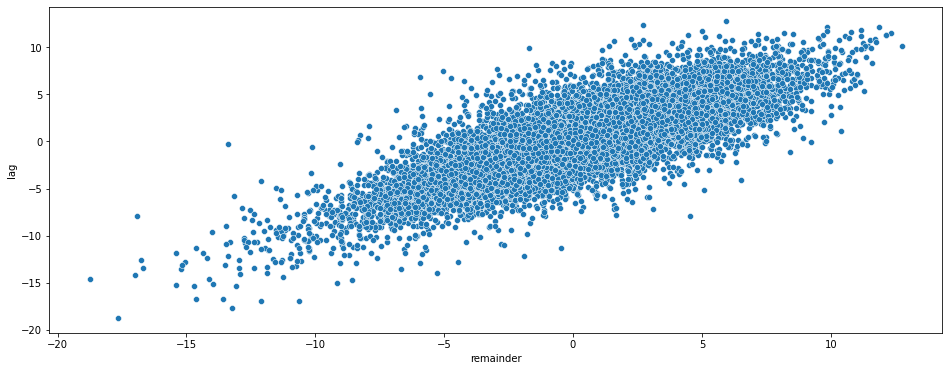

In [384]:
sns.scatterplot(x='remainder',  y='lag', data=train_data);

In [385]:
train_data['remainder'].corr(train_data['lag'])

0.8076009421591306

### Running AR on the remainder

In [386]:
X = train_data[['lag']]  # only feature is the lagged remainder
y = train_data['remainder']

m_ar = LinearRegression()

m_ar.fit(X, y)

train_data['prediction_ar1'] = m_ar.predict(X)

train_data.head()

,timestep,TG,August,December,February,January,July,June,March,May,November,October,September,Spring,Summer,Winter,seasonal,remainder,lag,prediction_ar1
DATE,,,,,,,,,,,,,,,,,,,,
1980-01-02,1,-0.5,0,0,0,1,0,0,0,0,0,0,0,0,0,1,-0.065053,-0.434947,0.865175,0.698834
1980-01-03,2,-3.5,0,0,0,1,0,0,0,0,0,0,0,0,0,1,-0.064931,-3.435069,-0.434947,-0.351164
1980-01-04,3,-6.5,0,0,0,1,0,0,0,0,0,0,0,0,0,1,-0.064809,-6.435191,-3.435069,-2.774109
1980-01-05,4,-2.3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,-0.064687,-2.235313,-6.435191,-5.197053
1980-01-06,5,-0.2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,-0.064566,-0.135434,-2.235313,-1.805167


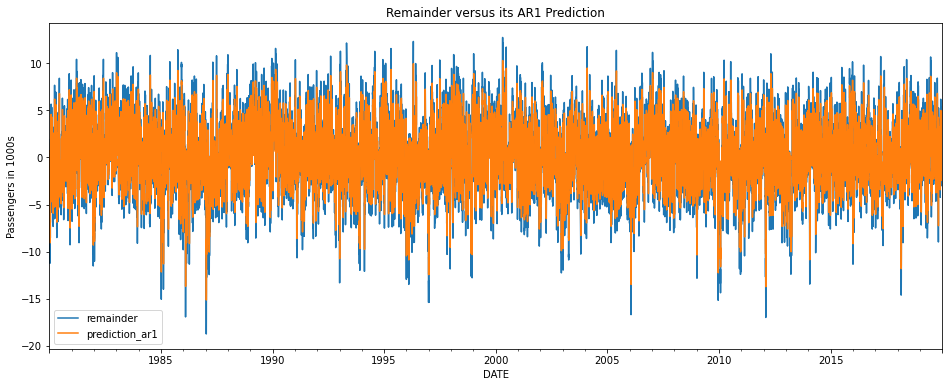

In [387]:
plot_timeseries(train_data[['remainder', 'prediction_ar1']], title="Remainder versus its AR1 Prediction", ylim=False)

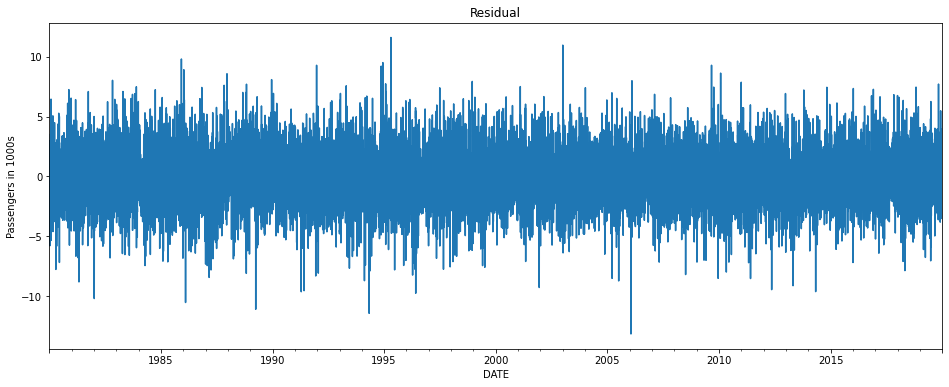

In [388]:
train_data['residual'] = train_data['remainder'] - train_data['prediction_ar1']

plot_timeseries(train_data['residual'], title="Residual", ylim=False)

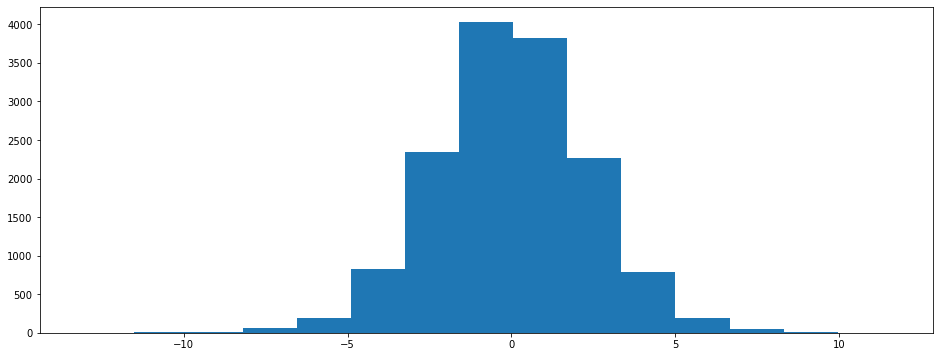

In [389]:
plt.hist(train_data['residual'], bins=15)
plt.show()

In [390]:
train_data['residual'].mean()

-4.0384182030652895e-17

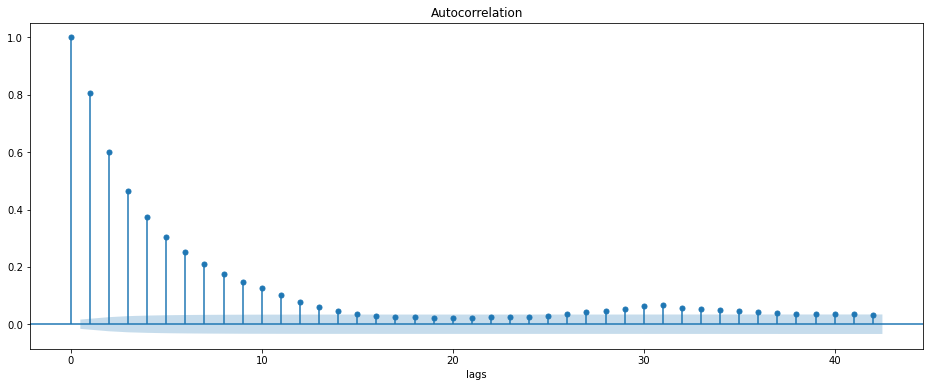

In [391]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train_data['remainder'])
plt.xlabel('lags');

plt.show()

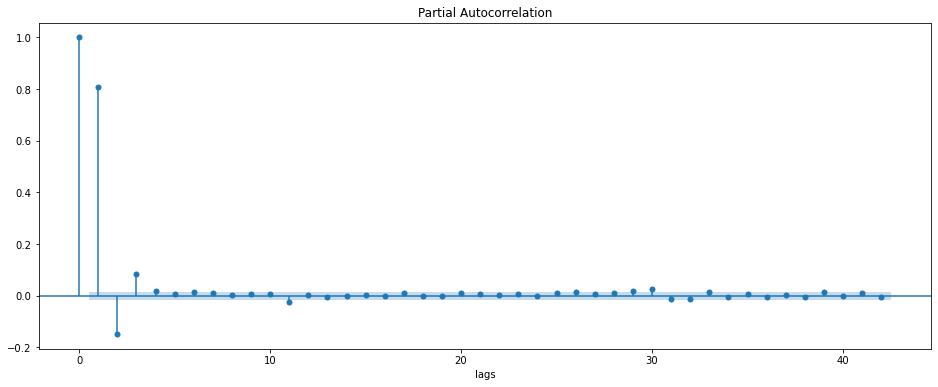

In [392]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train_data['remainder'])
plt.xlabel('lags');

plt.show()

### Fitting Training Data with the remainder lag feature

In [393]:
train_data.head()

,timestep,TG,August,December,February,January,July,June,March,May,...,October,September,Spring,Summer,Winter,seasonal,remainder,lag,prediction_ar1,residual
DATE,,,,,,,,,,,,,,,,,,,,,
1980-01-02,1,-0.5,0,0,0,1,0,0,0,0,...,0,0,0,0,1,-0.065053,-0.434947,0.865175,0.698834,-1.133781
1980-01-03,2,-3.5,0,0,0,1,0,0,0,0,...,0,0,0,0,1,-0.064931,-3.435069,-0.434947,-0.351164,-3.083905
1980-01-04,3,-6.5,0,0,0,1,0,0,0,0,...,0,0,0,0,1,-0.064809,-6.435191,-3.435069,-2.774109,-3.661082
1980-01-05,4,-2.3,0,0,0,1,0,0,0,0,...,0,0,0,0,1,-0.064687,-2.235313,-6.435191,-5.197053,2.961741
1980-01-06,5,-0.2,0,0,0,1,0,0,0,0,...,0,0,0,0,1,-0.064566,-0.135434,-2.235313,-1.805167,1.669733


In [394]:
X = train_data.drop(['TG','seasonal','remainder','prediction_ar1','residual'],axis=1)
y = train_data['TG']
m_full_model = LinearRegression()
m_full_model.fit(X,y)
m_full_model.score(X,y)

0.9126609983563168

### Evaluating LinReg Model

In [395]:
# Create a TimeSeriesSplit object
ts_split = TimeSeriesSplit(n_splits=5) # instanciate the class and give the k as input

time_cv = ts_split.split(X, y) # this is a python generator

In [396]:
# let's see how that works

# Split the training data into folds
for i, (train_index, validation_index) in enumerate(time_cv):
    print("The training data for iteration #{} are the observations steps  = {}".format(i+1, train_index))
    print("size of training data = {}".format(len(train_index)))
    print("The validation data for iteration #{} are the observations steps = {}".format(i+1, validation_index))
    print("size of validation data = {}".format(len(validation_index)))
    

The training data for iteration #1 are the observations steps  = [   0    1    2 ... 2436 2437 2438]
size of training data = 2439
The validation data for iteration #1 are the observations steps = [2439 2440 2441 ... 4870 4871 4872]
size of validation data = 2434
The training data for iteration #2 are the observations steps  = [   0    1    2 ... 4870 4871 4872]
size of training data = 4873
The validation data for iteration #2 are the observations steps = [4873 4874 4875 ... 7304 7305 7306]
size of validation data = 2434
The training data for iteration #3 are the observations steps  = [   0    1    2 ... 7304 7305 7306]
size of training data = 7307
The validation data for iteration #3 are the observations steps = [7307 7308 7309 ... 9738 9739 9740]
size of validation data = 2434
The training data for iteration #4 are the observations steps  = [   0    1    2 ... 9738 9739 9740]
size of training data = 9741
The validation data for iteration #4 are the observations steps = [ 9741  9742  9

In [397]:
# cross validate model and read scores 
time_cv = ts_split.split(X, y)

estimator = LinearRegression() # instanciate 

r_squared_scores = cross_val_score(estimator=estimator, X=X, y=y, cv=time_cv )

print(r_squared_scores)
print(r_squared_scores.mean())

[0.89644236 0.9052311  0.92298459 0.91658284 0.91348966]
0.9109461092538726


### Predicting Test Data

#### Transforming Test Data Format into Train Data Format

In [421]:
test_data.head()

,TG
DATE,
2020-01-01,2.7
2020-01-02,0.9
2020-01-03,4.6
2020-01-04,4.2
2020-01-05,1.8


#### Test Data Trend

In [422]:
# add time step

last_train_timestep = train_data['timestep'].max() 

test_data['timestep'] = list(range(last_train_timestep + 1, len(test_data) + last_train_timestep + 1))
test_data.head()

,TG,timestep
DATE,,
2020-01-01,2.7,14610
2020-01-02,0.9,14611
2020-01-03,4.6,14612
2020-01-04,4.2,14613
2020-01-05,1.8,14614


#### Test Data Seasonality + Seasons

In [429]:
test_data['month_name'] = test_data.index.month_name()

In [430]:
test_data.head()

,TG,timestep,season,month_name
DATE,,,,
2020-01-01,2.7,14610,Winter,January
2020-01-02,0.9,14611,Winter,January
2020-01-03,4.6,14612,Winter,January
2020-01-04,4.2,14613,Winter,January
2020-01-05,1.8,14614,Winter,January


In [425]:
test_data.loc[(test_data.index.month_name() == 'December') |
               (test_data.index.month_name() == 'January') |
               (test_data.index.month_name() == 'February'), 'season'] = 'Winter'  
test_data.loc[(test_data.index.month_name() == 'March') |
               (test_data.index.month_name() == 'April') |
               (test_data.index.month_name() == 'May'), 'season'] = 'Spring'  
test_data.loc[(test_data.index.month_name() == 'June') |
               (test_data.index.month_name() == 'July') |
               (test_data.index.month_name() == 'August'), 'season'] = 'Summer'  
test_data.loc[(test_data.index.month_name() == 'September') |
               (test_data.index.month_name() == 'October') |
               (test_data.index.month_name() == 'November'), 'season'] = 'Autumn'  

# train_data.loc[(df['first_name'] != 'Bill') & (df['first_name'] != 'Emma'), 'name_match'] = 'Mismatch'  


In [431]:
test_data = pd.get_dummies(test_data,prefix='',prefix_sep='',drop_first=True)

In [432]:
test_data.head()

,TG,timestep,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September
DATE,,,,,,,,,,,,,,,,
2020-01-01,2.7,14610,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2020-01-02,0.9,14611,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2020-01-03,4.6,14612,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2020-01-04,4.2,14613,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2020-01-05,1.8,14614,0,0,1,0,0,0,1,0,0,0,0,0,0,0


#### Test Data Remainder Lag

In [433]:
X_season.head()

,timestep,August,December,February,January,July,June,March,May,November,October,September,Spring,Summer,Winter
DATE,,,,,,,,,,,,,,,
1980-01-01,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1980-01-02,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1980-01-03,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1980-01-04,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1980-01-05,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [435]:
X_season_t = test_data.loc[:,test_data.columns != 'TG']
y_season_t = test_data['TG']

test_data['seasonal'] = m_season.predict(X_season_t)
test_data['remainder'] = test_data['TG']-test_data['seasonal']


In [436]:
test_data['lag'] = test_data['remainder'].shift(1)

In [437]:
train_data.tail()

,timestep,TG,August,December,February,January,July,June,March,May,...,September,Spring,Summer,Winter,seasonal,remainder,lag,prediction_ar1,residual,month_name
DATE,,,,,,,,,,,,,,,,,,,,,
2019-12-27,14605,3.1,0,1,0,0,0,0,0,0,...,0,0,0,1,3.017661,0.082339,1.882461,1.520410,-1.438071,December
2019-12-28,14606,1.3,0,1,0,0,0,0,0,0,...,0,0,0,1,3.017782,-1.717782,0.082339,0.066604,-1.784387,December
2019-12-29,14607,0.0,0,1,0,0,0,0,0,0,...,0,0,0,1,3.017904,-3.017904,-1.717782,-1.387202,-1.630703,December
2019-12-30,14608,4.5,0,1,0,0,0,0,0,0,...,0,0,0,1,3.018026,1.481974,-3.017904,-2.437200,3.919174,December
2019-12-31,14609,6.0,0,1,0,0,0,0,0,0,...,0,0,0,1,3.018148,2.981852,1.481974,1.196970,1.784881,December


In [438]:
test_data.loc['2020-01-01','lag'] = train_data.loc['2019-12-31','remainder']


In [439]:
X_t = test_data.drop(['TG','seasonal','remainder'],axis=1)
y_t = test_data['TG']
test_data['predictions'] = m_full_model.predict(X_t)

In [440]:
m_full_model.score(X_t,y_t)

0.8067820645319256

In [441]:
test_data.head()

,TG,timestep,Spring,Summer,Winter,August,December,February,January,July,June,March,May,November,October,September,seasonal,remainder,lag,predictions
DATE,,,,,,,,,,,,,,,,,,,,
2020-01-01,2.7,14610,0,0,1,0,0,0,1,0,0,0,0,0,0,0,4.149864,-1.449864,2.981852,6.600845
2020-01-02,0.9,14611,0,0,1,0,0,0,1,0,0,0,0,0,0,0,4.149985,-3.249985,-1.449864,3.021382
2020-01-03,4.6,14612,0,0,1,0,0,0,1,0,0,0,0,0,0,0,4.150107,0.449893,-3.249985,1.567510
2020-01-04,4.2,14613,0,0,1,0,0,0,1,0,0,0,0,0,0,0,4.150229,0.049771,0.449893,4.556097
2020-01-05,1.8,14614,0,0,1,0,0,0,1,0,0,0,0,0,0,0,4.150351,-2.350351,0.049771,4.233033


#### Plotting actual and predictions

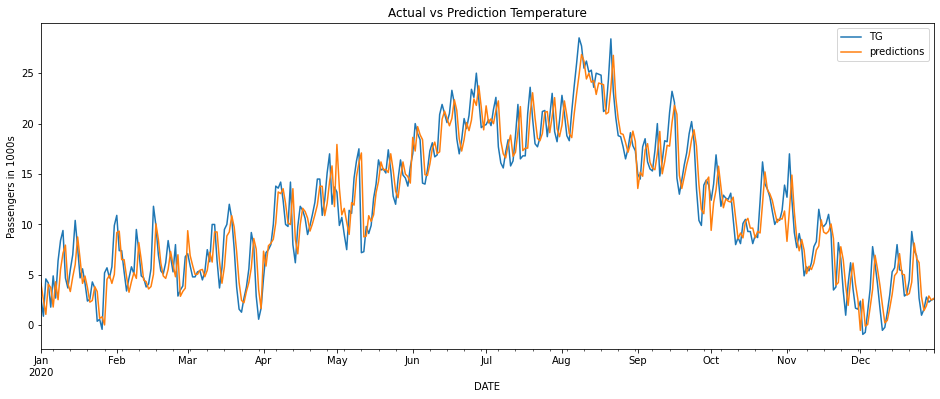

In [197]:
plot_timeseries(test_data[['TG', 'predictions']], title="Actual vs Prediction Temperature", ylim=False)

### Export Data

In [1]:
train_data.to_csv("temp_train_data.csv")
test_data.to_csv("temp_test_data.csv")

NameError: name 'train_data' is not defined